In this kernel, we will do the clustering using Machine Learning module: SciKit Learn  
Once clustering is done, we will then identify young talents who posses capability to be like the livings legends in the game.
Steps:  
1) Create matrices to evaluate players performance in three different areas of the game (Attack, Defense & Midfield)  
2) Label all the players above the age of 21 and overall rating over 80 as legends  
3) Use support vector machine to predict young talents with potential of being a legend! 

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

Cleaning Data
-------------

In [13]:
df = pd.read_csv('../input/FullData.csv')
Names = pd.read_csv('../input/PlayerNames.csv')
df.assign(Index=np.nan)
df['Index'] = [v.split('/')[2] for v in Names['url']]

#weigts
a = 0.5
b = 1
c= 2
d = 3

Finding Best Young Attacking Talent in The Game
===============================================

Manipulating Data
-----------------

In [14]:
#Attackers Index calculated using given feature space
df['at_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['at_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

X = df[['Name', 'Club_Position', 'Rating', 'Age', 'at_wing', 'at_striker']]

# Filtering out only strikers and wingers
X = X[(X['Club_Position'] == 'ST') | (X['Club_Position'] == 'RW') | (X['Club_Position'] == 'LW')]

# Normalizing the Features: We did MinMax Scaling. Same can be used using MinMaxScalers via Sklearn Module.
X['at_wing'] = (X['at_wing']-X.at_wing.min())/(X.at_wing.max() - X.at_wing.min())
X['at_striker'] = (X['at_striker']-X.at_striker.min())/(X.at_striker.max() - X.at_striker.min())

# Labeling the Legends: Score is a component of overall rating which indicates to the capability of the player
X['Score'] = ((X['at_wing']+X['at_striker'])/2)*100/X['Rating']
X['Status'] = np.where(((X['Score'] > 0.8) & (X['Club_Position'] == 'RW')), 'W', np.where(((X['Score'] > 0.8) & (X['Club_Position'] == 'ST')), 'ST', np.where(((X['Score'] > 0.8) & (X['Club_Position'] == 'LW')), 'W', 0)))

X.head()

,Name,Club_Position,Rating,Age,at_wing,at_striker,Score,Status
0,Cristiano Ronaldo,LW,94,32,0.980488,0.985985,1.045996,W
1,Lionel Messi,RW,93,29,1.000000,1.000000,1.075269,W
2,Neymar,LW,92,25,0.933875,0.834295,0.960962,W
3,Luis Suárez,ST,92,30,0.908401,0.845837,0.953390,ST
6,Robert Lewandowski,ST,90,28,0.802710,0.978566,0.989598,ST


*Creating test ad train data manually keeping **age as a factor** since our objective is to find youth with potential to be a Legend!*

In [15]:
#Making Train and Test Data
X_train = X[X['Age'] > 22]
y_train = X_train.Status
X_train = X_train[['at_wing', 'at_striker']]

test = X[X['Age'] < 23]
y_test = test.Status
X_test = test[['at_wing', 'at_striker']]

#Running SVC
clf = svm.SVC(kernel='rbf', gamma=1, C=100).fit(X_train, y_train)

Plotting Best Young Attacking Talent in the game:
-------------------------------------------------

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


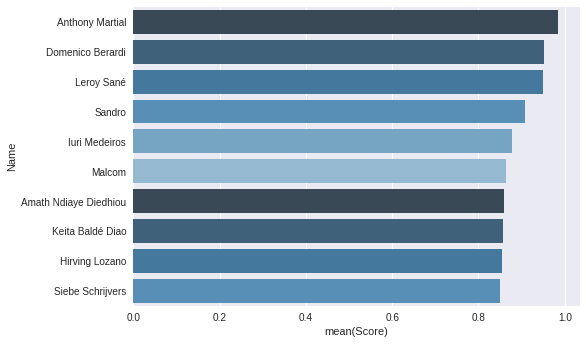

In [16]:
result = clf.predict(X_test)
test['Status'] = result
Data = test.sort_values(['Score', 'Age'], ascending=[False, True])[:10]
sns.barplot( 'Score', 'Name', data= Data, palette = sns.color_palette("Blues_d"))

Finding Best Young Defensive Talent in The Game
===============================================

Manipulating Data
-----------------

In [17]:
#Defending Indices
df['df_Hulk'] = (c*df.Marking + c*df.Sliding_Tackle + c*df.Standing_Tackle + c*df.Aggression + a*df.Reactions + b*df.Interceptions + c*df.Strength)/(5*c + b + a)
df['df_Aerial_Beast'] = (c*df.Marking + b*df.Sliding_Tackle + b*df.Standing_Tackle + c*df.Sliding_Tackle + c*df.Reactions + c*df.Interceptions + b*df.Balance + c*df.Jumping + b*df.Agility + d*df.Heading)/(5*c + 4*b + d)
df['df_Sweeper'] = (c*df.Ball_Control + b*df.Reactions + b*df.Interceptions + d*df.Vision + b*df.Composure + b*df.Short_Pass + b*df.Long_Pass)/(5*b + c + d)
df['df_wb_Wing_Back_Eff'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + c*df.Sliding_Tackle + b*df.Standing_Tackle + c*df.Attacking_Position + d*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(3*a + 4*b + 4*c + 3*d)

X = df[['Name', 'Club_Position', 'Rating', 'Age', 'df_Hulk', 'df_Aerial_Beast', 'df_Sweeper', 'df_wb_Wing_Back_Eff']]

# Filtering out only strikers and wingers
X = X[(X['Club_Position'] == 'CB') | (X['Club_Position'] == 'RB') | (X['Club_Position'] == 'LB') | (X['Club_Position'] == 'LCB') | (X['Club_Position'] == 'RCB') | (X['Club_Position'] == 'LWB') | (X['Club_Position'] == 'RWB')]

# Normalizing the Features: We did MinMax Scaling. Same can be used using MinMaxScalers via Sklearn Module.
X['df_Hulk'] = (X['df_Hulk']-X.df_Hulk.min())/(X.df_Hulk.max() - X.df_Hulk.min())
X['df_Aerial_Beast'] = (X['df_Aerial_Beast']-X.df_Aerial_Beast.min())/(X.df_Aerial_Beast.max() - X.df_Aerial_Beast.min())
X['df_Sweeper'] = (X['df_Sweeper']-X.df_Sweeper.min())/(X.df_Sweeper.max() - X.df_Sweeper.min())
X['df_wb_Wing_Back_Eff'] = (X['df_wb_Wing_Back_Eff']-X.df_wb_Wing_Back_Eff.min())/(X.df_wb_Wing_Back_Eff.max() - X.df_wb_Wing_Back_Eff.min())

# Labeling the Legends: Score is a component of overall rating which indicates to the capability of the player
X['Score'] = ((X['df_Hulk']+X['df_Aerial_Beast']+X['df_Sweeper']+X['df_wb_Wing_Back_Eff'])/4)*100/X['Rating']
X['Status'] = np.where(((X['Score'] > 0.8) & ((X['Club_Position'] == 'CB') | (X['Club_Position'] == 'LB') | (X['Club_Position'] == 'LCB') | (X['Club_Position'] == 'RB') | (X['Club_Position'] == 'RCB'))), 'B', np.where(((X['Score'] > 0.8) & ((X['Club_Position'] == 'LWB') | (X['Club_Position'] == 'RWB'))), 'WB', 0))

X.head()

,Name,Club_Position,Rating,Age,df_Hulk,df_Aerial_Beast,df_Sweeper,df_wb_Wing_Back_Eff,Score,Status
15,Thiago Silva,LCB,89,32,0.928090,1.000000,0.888288,0.810546,1.018799,B
16,Sergio Ramos,LCB,89,31,0.925094,1.000000,0.798198,0.810546,0.992651,B
24,Diego Godín,LCB,88,31,0.924345,0.981179,0.731532,0.631358,0.928527,B
25,Mats Hummels,LCB,88,28,0.886891,0.919699,0.922523,0.752683,0.989147,B
27,Giorgio Chiellini,LCB,88,32,1.000000,0.946048,0.565766,0.601960,0.884595,B


*Creating test ad train data manually keeping **age as a factor** since our objective is to find youth with potential to be a Legend!*

In [18]:
#Making Train and Test Data
X_train = X[X['Age'] > 21]
y_train = X_train.Status
X_train = X_train[['df_Hulk', 'df_Aerial_Beast', 'df_Sweeper', 'df_wb_Wing_Back_Eff']]

test = X[X['Age'] < 22]
y_test = test.Status
X_test = test[['df_Hulk', 'df_Aerial_Beast', 'df_Sweeper', 'df_wb_Wing_Back_Eff']]

#Running SVC
clf = svm.SVC(kernel='rbf', gamma=1, C=100).fit(X_train, y_train)

Plotting Best Young Defensive Talent in the game:
-------------------------------------------------

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


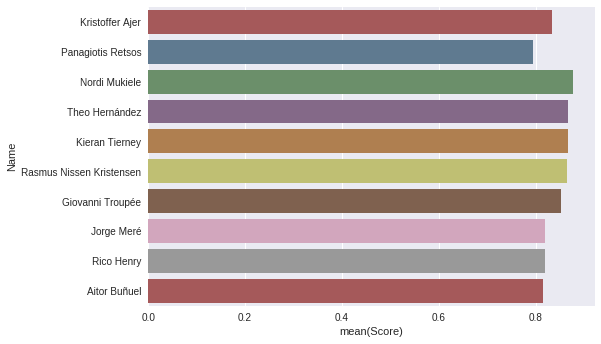

In [19]:
result = clf.predict(X_test)
test['Status'] = result
Data = test[test['Status'] != '0'].sort_values(['Age', 'Score'], ascending=[True, False])[:10]
sns.barplot( 'Score', 'Name', data= Data, palette = sns.color_palette("Set1", n_colors=10, desat=.5))

Talent in Midfield

Manipulating Data
-----------------

In [25]:
#Midfielding Indices
df['mf_controller'] = (a*df.Weak_foot + c*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + d*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)
df['mf_beast'] = (b*df.Agility + b*df.Balance + b*df.Jumping + c*df.Strength + c*df.Stamina + b*df.Speed + a*df.Acceleration + b*df.Short_Pass + d*df.Aggression + d*df.Reactions + d*df.Marking + c*df.Standing_Tackle + c*df.Sliding_Tackle + d*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_playmaker'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + b*df.Reactions + d*df.Vision + c*df.Crossing + c*df.Short_Pass + c*df.Long_Pass + a*df.Curve + a*df.Long_Shots + c*df.Freekick_Accuracy)/(4*a + 2*b + 4*c + d)
df['mf_attacker'] = (b*df.Ball_Control + c*df.Dribbling + b*df.Vision + b*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + c*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 3*c + d)
X = df[['Name', 'Club_Position', 'Rating', 'Age', 'mf_controller', 'mf_beast', 'mf_playmaker', 'mf_attacker']]

# Filtering out only strikers and wingers
X = X[(X['Club_Position'] == 'RAM') | (X['Club_Position'] == 'RDM') | (X['Club_Position'] == 'RCM') | (X['Club_Position'] == 'LCM') | (X['Club_Position'] == 'LDM') | (X['Club_Position'] == 'LAM') | (X['Club_Position'] == 'CDM') | (X['Club_Position'] == 'CAM') | (X['Club_Position'] == 'LM') | (X['Club_Position'] == 'RM')]

# Normalizing the Features: We did MinMax Scaling. Same can be used using MinMaxScalers via Sklearn Module.
X['mf_controller'] = (X['mf_controller']-X.mf_controller.min())/(X.mf_controller.max() - X.mf_controller.min())
X['mf_beast'] = (X['mf_beast']-X.mf_beast.min())/(X.mf_beast.max() - X.mf_beast.min())
X['mf_playmaker'] = (X['mf_playmaker']-X.mf_playmaker.min())/(X.mf_playmaker.max() - X.mf_playmaker.min())
X['mf_attacker'] = (X['mf_attacker']-X.mf_attacker.min())/(X.mf_attacker.max() - X.mf_attacker.min())

# Labeling the Legends: Score is a component of overall rating which indicates to the capability of the player
X['Score'] = ((X['mf_controller']+X['mf_beast']+X['mf_playmaker']+X['mf_attacker'])/4)*100/X['Rating']
X['Status'] = np.where((X['Score'] > 0.8) & (X['Club_Position'] == 'RAM') | (X['Club_Position'] == 'RDM') | (X['Club_Position'] == 'RCM') | (X['Club_Position'] == 'LCM') | (X['Club_Position'] == 'LDM') | (X['Club_Position'] == 'LAM') | (X['Club_Position'] == 'CDM') | (X['Club_Position'] == 'CAM') | (X['Club_Position'] == 'LM') | (X['Club_Position'] == 'RM'), 'M', 0)

X.head()

,Name,Club_Position,Rating,Age,mf_controller,mf_beast,mf_playmaker,mf_attacker,Score,Status
12,Luka Modrić,RCM,89,31,0.945432,0.805128,0.967284,0.943348,1.028425,M
13,Mesut Özil,CAM,89,28,0.908032,0.286785,0.956790,0.929981,0.865615,M
18,Paul Pogba,LCM,88,24,0.933783,0.853254,0.961111,0.927435,1.044200,M
20,Kevin De Bruyne,RCM,88,25,0.905579,0.561736,0.970370,0.968810,0.967754,M
23,Toni Kroos,LCM,88,27,0.960760,0.678107,1.000000,0.914067,1.009356,M


*Creating test ad train data manually keeping **age as a factor** since our objective is to find youth with potential to be a Legend!*

In [26]:
#Making Train and Test Data
X_train = X[X['Age'] > 21]
y_train = X_train.Status
X_train = X_train[['mf_controller', 'mf_beast', 'mf_playmaker', 'mf_attacker']]

test = X[X['Age'] < 22]
y_test = test.Status
X_test = test[['mf_controller', 'mf_beast', 'mf_playmaker', 'mf_attacker']]

#Running SVC
clf = svm.SVC(kernel='rbf', gamma=1, C=100).fit(X_train, y_train)

Plotting Best Young MidfieldTalent in the game:
-------------------------------------------------

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


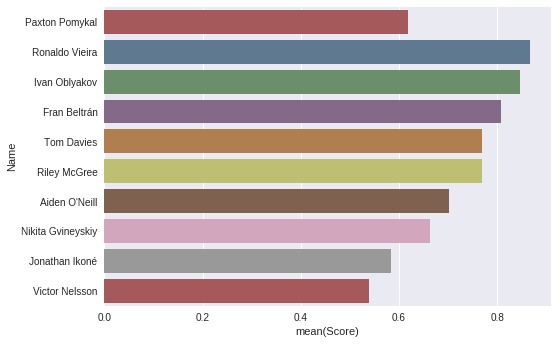

In [27]:
result = clf.predict(X_test)
test['Status'] = result
Data = test[test['Status'] != '0'].sort_values(['Age', 'Score'], ascending=[True, False])[:10]
sns.barplot( 'Score', 'Name', data= Data, palette = sns.color_palette("Set1", n_colors=10, desat=.5))

*Below are the list of most promising young talents among three major areas of the game.  
Only time can tel how accurate these predictions are in coming 2 years.*

Top Promising Young Attackers:
------------------------------

Anthony Martial | Domenico Berardi | Leroy Sané | Sandro | Iuri Medeiros | Malcom | Amath Ndiaye Diedhiou | Keita Baldé Diao | Hirving Lozano | Siebe Schrijvers  

Top Promising Young Defenders:
------------------------------

Kristoffer Ajer | Panagiotis Retsos | Nordi Mukiele | Theo Hernández | Kieran Tierney | Rasmus Nissen Kristensen | Giovanni Troupée | Jorge Meré | Rico Henry | Aitor Buñuel  

Top Promising Young Midfielders:
------------------------------
Paxton Pomykal | Ronaldo Vieira | Ivan Oblyakov | Fran Beltrán | Tom Davies | Riley McGree | Aiden O'Neill | Nikita Gvineyskiy | Jonathan Ikoné | Victor Nelsson
